# Лабораторная работа №5: Сравнение статистических свойств разных точечных оценок математического ожидания и дисперсии.

Цели и задачи л/р: выполнить массовое статистическое моделирование, направленное на 
изучение статистических свойств разных точечных оценок математического ожидания и 
дисперсии, сравнение с теоретически ожидаемыми свойствами, верная статистическая 
интерпретация результатов.

Задание.  
1.  Создать по $N = 10^3$ выборок из нормального распределения с математическим
    ожиданием, равным 0, и дисперсией, равной 1, размером $n = 10, 20, \ldots 100$.
    
    По каждой выборке оценить точечно математическое ожидание через выборочное среднее 
    $c^* = \bar{x} = \frac{1}{n}\cdot\sum_{i=1}^{i=n}x_i$, дисперсию по
    формулам неисправленной и исправленной точечных оценок (т.е. 
    $D^* = \frac{1}{n}\cdot\sum_{i=1}^{i=n}(x_i-\bar{x})^2$ и
    $D^*=\frac{1}{n-1}\cdot\sum_{i=1}^{i=n}(x_i-\bar{x})^2$)

    Получив $N$ оценок (по всем выборкам заданного размера n) оценить их средние
    $M[c^*]$, $M[D^*]$ и дисперсии $D[c^*]$, $D[D^*]$ (также точечно). Сравнить
    полученные результаты с теоретически ожидаемыми (т.е. с точными значениями
    математического ожидания и дисперсии данных оценок – cм. лекцию) в виде
    графиков в зависимости от n. Сделать выводы о смещенности или несмещенности.

2.  Построить по полученным $N$ значениям оценок выборочные функции распределения
    (для $n = 10$ и $n = 100$). Наложить на те же графики теоретические функции
    распределения данных оценок (для тех же размеров графиков) – см. лекцию. Сделать
    выводы.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from pathlib import Path
from tqdm.contrib.concurrent import process_map
# %pip install ipywidgets
import scipy

np.random.seed(42)

In [62]:
SAMPLE_SIZES = list(range(10, 101, 10))
NUM_EXPERIMENTS = 1000
TRUE_C = 0
TRUE_D = 1
OUT_DIR = Path("lab-5")
OUT_DIR.mkdir(parents=True, exist_ok=True)

In [3]:
def estimate_params(sample: np.ndarray):
    n = len(sample)
    avg = sample.sum() / n
    d_tmp = ((sample - avg) ** 2).sum()
    d = d_tmp / n
    d_fix = d_tmp / (n - 1)
    return avg, d, d_fix

In [4]:
def experiment(args):
    i, n = args
    sample = np.random.normal(loc=TRUE_C, scale=TRUE_D, size=n)
    avg, d, d_fix = estimate_params(sample)
    return [n, avg, d, d_fix]

In [63]:
experiment_args = list(itertools.product(range(NUM_EXPERIMENTS), SAMPLE_SIZES))
rs = process_map(experiment, experiment_args, chunksize=1)

  0%|          | 0/10000 [00:00<?, ?it/s]

In [64]:
df = pd.DataFrame(rs, columns=["size", "avg", "d", "d_fix"])
df.to_csv(OUT_DIR / "norm.csv", index=False)
df

,size,avg,d,d_fix
0,10,0.448061,0.470467,0.522741
1,20,-0.171299,0.875572,0.921655
2,30,-0.188147,0.783011,0.810012
3,40,-0.218637,0.885149,0.907845
4,50,-0.225474,0.854303,0.871737
...,...,...,...,...
9995,60,0.124727,0.867678,0.882384
9996,70,0.010607,0.880837,0.893603
9997,80,0.074365,0.824886,0.835328
9998,90,0.196672,0.877231,0.887088


In [ ]:
df = pd.read_csv(OUT_DIR / "norm.csv")

In [102]:
chars = df.groupby(["size"]).agg(
    {"avg": ["mean", "var"], "d": ["mean", "var"], "d_fix": ["mean", "var"]}
)
chars

avg                   d               d_fix          
          mean       var      mean       var      mean       var
size                                                            
10   -0.007566  0.099644  0.903639  0.176597  1.004044  0.218020
20   -0.002668  0.051169  0.964378  0.092332  1.015135  0.102307
30    0.001635  0.032856  0.966995  0.064080  1.000340  0.068576
40   -0.002610  0.024688  0.973767  0.045883  0.998736  0.048266
50   -0.004619  0.018870  0.985889  0.040859  1.006009  0.042543
60    0.007331  0.015684  0.988930  0.031906  1.005692  0.032996
70    0.003275  0.014232  0.981489  0.030174  0.995713  0.031054
80   -0.003017  0.013059  0.983524  0.026019  0.995973  0.026682
90    0.000080  0.010969  0.982227  0.021242  0.993263  0.021722
100  -0.000259  0.009335  0.991371  0.019802  1.001385  0.020204

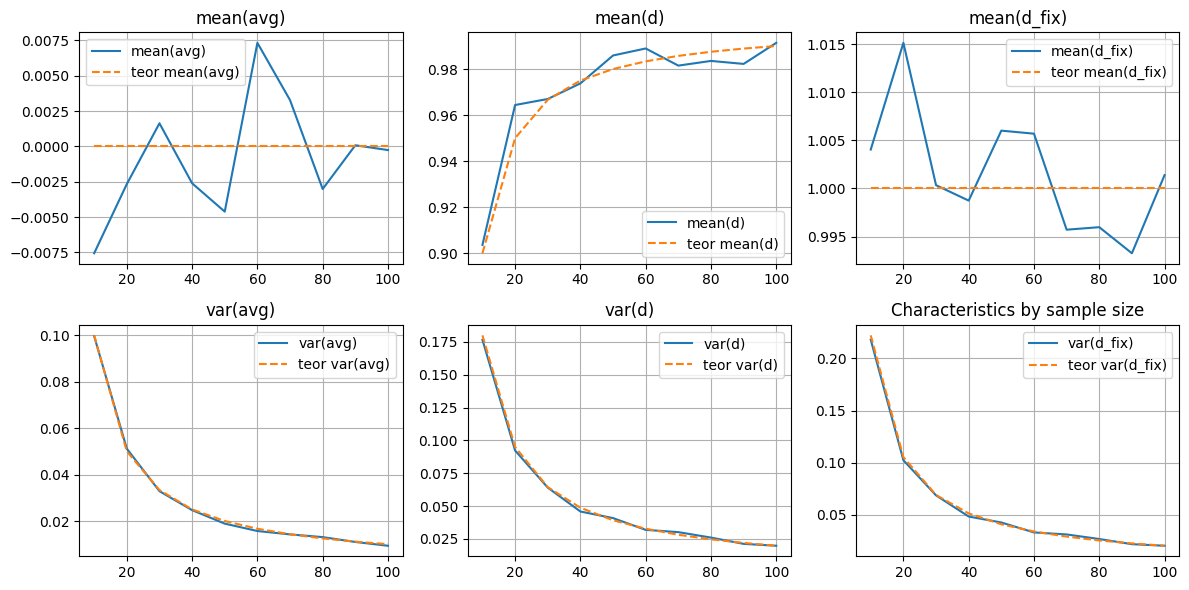

In [ ]:
chars_names = chars.columns.get_level_values(0).unique()
chars_chars = chars.columns.get_level_values(1).unique()
n = len(chars_chars)
m = len(chars_names)
figsize = (4 * m, 3 * n)
fig, axs = plt.subplots(
    n,
    m,
    figsize=(figsize[0], figsize[1]),
    squeeze=True,
)
map_char_ax = dict(zip(chars_chars, range(n)))
map_name_ax = dict(zip(chars_names, range(m)))

sizes = chars.index

map_teor = {
    "avg": {
        "mean": [TRUE_C for _ in sizes],
        "var": 1 / sizes
    },
    "d": {
        "mean": (sizes - 1) / sizes,
        "var": 2 * (sizes - 1) / (sizes**2)
    },
    "d_fix": {
        "mean": [TRUE_D for _ in sizes],
        "var": 2 / (sizes - 1)
    }
}

for name, char in chars.columns:
    ax = axs[map_char_ax[char], map_name_ax[name]]
    ax.plot(sizes, chars[(name, char)], label=f"{char}({name})")
    ax.plot(sizes, map_teor[name][char], label=f"teor {char}({name})", linestyle="--")

    ax.grid(True)
    ax.set_title(f"{char}({name})")
    ax.legend()

plt.tight_layout()
plt.show()